In [2]:
import numpy as np
import pandas as pd
import scipy.sparse 
import multiprocessing as mp
import glob
import re
import time, timeit
import matplotlib.pyplot as plt
import sys
import random
sys.path.insert(1, '../src/mf_algorithms')

from functions import *

# Iteration Tests (vary niter)

The following tests will measure the resulting relative approx error from 1 to 100 outer iterations for 10, 100, 500, and 1000 subiterations. We will keep the sampling size at 1 to better compare RK and GS against ALS. Note that the subiterations for ALS will be fixed at 1, since that just makes more sense.

File naming convention: solver + "iter" + numberofiterations + "subiter" + numberofsubiterations + "err" + matrixdim

Seed is set before matrix generation to keep it the same for all tests, the stochasticity of the methods should offset the set seed

In [92]:
seed = 1
dim = 200
k = 4
iterdata, A, S = createmat(dim, k, seed)
np.count_nonzero(iterdata == 0) / (iterdata.shape[0]*iterdata.shape[1])

0.515475

In [15]:
%%time
i = 1
while(i <= 100):
    fname = "Errors/itertests/alsiter" + str(i) + "subiter1err200.txt"
    mpmf(iterdata, k = 4, s = 1, niter = i, siter = 1, solver = 'als', filename = fname, loop = 15)
    i = i + 1

Wall time: 1min 58s


### subiterations = 10

In [5]:
%%time
i = 1
while(i <= 100):
    fname = "Errors/itertests/rkiter" + str(i) + "subiter10err200.txt"
    mpmf(iterdata, k = 4, s = 1, niter = i, siter = 10, solver = 'brk', filename = fname, loop = 15)
    i = i + 1

Wall time: 4min 8s


In [96]:
%%time
i = 1
while(i <= 100):
    fname = "Errors/itertests/quickrkiter" + str(i) + "subiter10err200.txt"
    mpmf(iterdata, k = 4, s = 1, niter = i, siter = 10, solver = 'quickbrk', filename = fname, loop = 15)
    i = i + 1

Wall time: 2min 32s


In [6]:
%%time
i = 1
while(i <= 100):
    fname = "Errors/itertests/gsiter" + str(i) + "subiter10err200.txt"
    mpmf(iterdata, k = 4, s = 1, niter = i, siter = 10, solver = 'bgs', filename = fname, loop = 15)
    i = i + 1

Wall time: 4min 2s


### subiterations = 100

In [8]:
%%time
i = 1
while(i <= 100):
    fname = "Errors/itertests/rkiter" + str(i) + "subiter100err200.txt"
    mpmf(iterdata, k = 4, s = 1, niter = i, siter = 100, solver = 'brk', filename = fname, loop = 15)
    i = i + 1

Wall time: 23min 11s


In [97]:
%%time
i = 1
while(i <= 100):
    fname = "Errors/itertests/quickrkiter" + str(i) + "subiter100err200.txt"
    mpmf(iterdata, k = 4, s = 1, niter = i, siter = 100, solver = 'quickbrk', filename = fname, loop = 15)
    i = i + 1

Wall time: 8min 25s


In [9]:
%%time
i = 1
while(i <= 100):
    fname = "Errors/itertests/gsiter" + str(i) + "subiter100err200.txt"
    mpmf(iterdata, k = 4, s = 1, niter = i, siter = 100, solver = 'bgs', filename = fname, loop = 15)
    i = i + 1

Wall time: 22min 2s


### subiterations = 500

In [30]:
%%time
i = 1
while(i <= 100):
    fname = "Errors/itertests/rkiter" + str(i) + "subiter500err200.txt"
    mpmf(iterdata, k = 4, s = 1, niter = i, siter = 500, solver = 'brk', filename = fname, loop = 15)
    i = i + 1

Wall time: 1h 10min 58s


In [98]:
%%time
i = 1
while(i <= 100):
    fname = "Errors/itertests/quickrkiter" + str(i) + "subiter500err200.txt"
    mpmf(iterdata, k = 4, s = 1, niter = i, siter = 500, solver = 'quickbrk', filename = fname, loop = 15)
    i = i + 1

Wall time: 35min 28s


In [31]:
%%time
i = 1
while(i <= 100):
    fname = "Errors/itertests/gsiter" + str(i) + "subiter500err200.txt"
    mpmf(iterdata, k = 4, s = 1, niter = i, siter = 500, solver = 'bgs', filename = fname, loop = 15)
    i = i + 1

Wall time: 1h 39min 23s


### subiterations = 1000 

In [33]:
%%time
i = 1
while(i <= 100):
    fname = "Errors/itertests/rkiter" + str(i) + "err200.txt"
    mpmf(iterdata, k = 4, s = 1, niter = i, siter = 1000, solver = 'brk', filename = fname, loop = 15)
    i = i + 1

Wall time: 2h 26min 44s


In [99]:
%%time
i = 1
while(i <= 100):
    fname = "Errors/itertests/quickrkiter" + str(i) + "err200.txt"
    mpmf(iterdata, k = 4, s = 1, niter = i, siter = 1000, solver = 'quickbrk', filename = fname, loop = 15)
    i = i + 1

Wall time: 1h 9min 52s


In [52]:
%%time
i = 66
while(i <= 100):
    fname = "Errors/itertests/gsiter" + str(i) + "err200.txt"
    mpmf(iterdata, k = 4, s = 1, niter = i, siter = 1000, solver = 'bgs', filename = fname, loop = 15)
    i = i + 1

Wall time: 6h 6min 38s


## Plots

In [128]:
title2, err2, std2 = extracterr("^((?!quick).)*rk.*(subiter10err).*", datafiles, 'iter')

In [132]:
datapath = 'Errors/itertests/*.txt'
datafiles = list(glob.glob(datapath))
title1, err1, std1 = extracterr(".*als.*(subiter1).*", datafiles, 'iter')
title2, err2, std2 = extracterr("^((?!quick).)*rk.*(subiter10err).*", datafiles, 'iter')
title3, err3, std3 = extracterr(".*gs.*(subiter10err).*", datafiles, 'iter')
title4, err4, std4 = extracterr(".*quickrk.*(subiter10err).*", datafiles, 'iter')

df1 = pd.DataFrame({'k': list(map(int, title1)), 'err': err1, 'std': std1})
df2 = pd.DataFrame({'k': list(map(int, title2)), 'err': err2, 'std': std2})
df3 = pd.DataFrame({'k': list(map(int, title3)), 'err': err3, 'std': std3})
df4 = pd.DataFrame({'k': list(map(int, title4)), 'err': err4, 'std': std4})

df1 = df1.sort_values(by=['k'])
df2 = df2.sort_values(by=['k'])
df3 = df3.sort_values(by=['k'])
df4 = df4.sort_values(by=['k'])

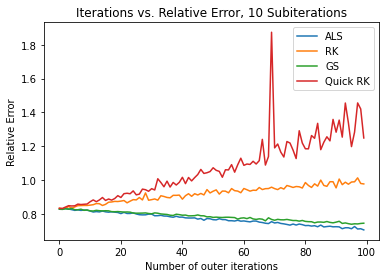

In [133]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0, 2*np.pi, 100)

line1, = ax.plot(range(100), df1['err'], label='ALS') # add Line2D in ax.lines
line2, = ax.plot(range(100), df2['err'], label='RK') # add another Line2D
line3, = ax.plot(range(100), df3['err'], label='GS') # add another Line2D
line4, = ax.plot(range(100), df4['err'], label='Quick RK') # add another Line2D

ax.set_xlabel('Number of outer iterations')
ax.set_ylabel('Relative Error')
ax.set_title('Iterations vs. Relative Error, 10 Subiterations')
ax.legend()

plt.show()

In [135]:
datapath = 'Errors/itertests/*.txt'
datafiles = list(glob.glob(datapath))
title1, err1, std1 = extracterr(".*als.*(subiter1).*", datafiles, 'iter')
title2, err2, std2 = extracterr("^((?!quick).)*rk.*(subiter100err).*", datafiles, 'iter')
title3, err3, std3 = extracterr(".*gs.*(subiter100err).*", datafiles, 'iter')
title4, err4, std4 = extracterr(".*quickrk.*(subiter100err).*", datafiles, 'iter')

df1 = pd.DataFrame({'k': list(map(int, title1)), 'err': err1, 'std': std1})
df2 = pd.DataFrame({'k': list(map(int, title2)), 'err': err2, 'std': std2})
df3 = pd.DataFrame({'k': list(map(int, title3)), 'err': err3, 'std': std3})
df4 = pd.DataFrame({'k': list(map(int, title4)), 'err': err4, 'std': std4})

df1 = df1.sort_values(by=['k'])
df2 = df2.sort_values(by=['k'])
df3 = df3.sort_values(by=['k'])
df4 = df4.sort_values(by=['k'])

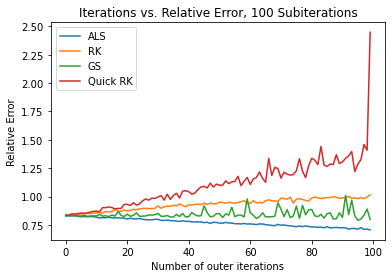

In [136]:
fig = plt.figure()
ax = fig.add_subplot(111)

line1, = ax.plot(range(100), df1['err'], label='ALS') # add Line2D in ax.lines
line2, = ax.plot(range(100), df2['err'], label='RK') # add another Line2D
line3, = ax.plot(range(100), df3['err'], label='GS') # add another Line2D
line4, = ax.plot(range(100), df4['err'], label='Quick RK') # add another Line2D

ax.set_xlabel('Number of outer iterations')
ax.set_ylabel('Relative Error')
ax.set_title('Iterations vs. Relative Error, 100 Subiterations')
ax.legend()

plt.show()

In [137]:
datapath = 'Errors/itertests/*.txt'
datafiles = list(glob.glob(datapath))
title1, err1, std1 = extracterr(".*als.*(subiter1).*", datafiles, 'iter')
title2, err2, std2 = extracterr("^((?!quick).)*rk.*(subiter500err).*", datafiles, 'iter')
title3, err3, std3 = extracterr(".*gs.*(subiter500err).*", datafiles, 'iter')
title4, err4, std4 = extracterr(".*quickrk.*(subiter500err).*", datafiles, 'iter')

df1 = pd.DataFrame({'k': list(map(int, title1)), 'err': err1, 'std': std1})
df2 = pd.DataFrame({'k': list(map(int, title2)), 'err': err2, 'std': std2})
df3 = pd.DataFrame({'k': list(map(int, title3)), 'err': err3, 'std': std3})
df4 = pd.DataFrame({'k': list(map(int, title4)), 'err': err4, 'std': std4})

df1 = df1.sort_values(by=['k'])
df2 = df2.sort_values(by=['k'])
df3 = df3.sort_values(by=['k'])
df4 = df4.sort_values(by=['k'])

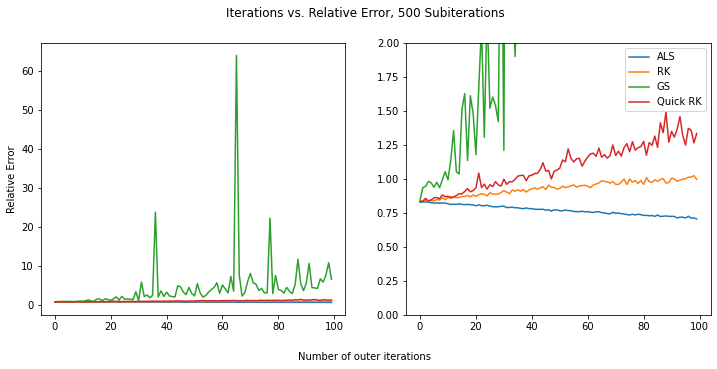

In [138]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

line1, = ax1.plot(range(100), df1['err'], label='ALS') 
line2, = ax1.plot(range(100), df2['err'], label='RK') 
line3, = ax1.plot(range(100), df3['err'], label='GS')
line4, = ax1.plot(range(100), df4['err'], label='Quick RK')

line1, = ax2.plot(range(100), df1['err'], label='ALS') 
line2, = ax2.plot(range(100), df2['err'], label='RK') 
line3, = ax2.plot(range(100), df3['err'], label='GS')
line4, = ax2.plot(range(100), df4['err'], label='Quick RK')

fig.suptitle('Iterations vs. Relative Error, 500 Subiterations')
fig.text(0.5, 0, "Number of outer iterations", ha = "center")
ax1.set_ylabel('Relative Error')
ax2.set_ylim([0, 2])
ax2.legend(loc='upper right')

plt.show()

In [139]:
datapath = 'Errors/itertests/*.txt'
datafiles = list(glob.glob(datapath))
title1, err1, std1 = extracterr(".*als.*(subiter1).*", datafiles, 'iter')
title2, err2, std2 = extracterr("^((?!quick).)*rk.*(subiter1000err).*", datafiles, 'iter')
title3, err3, std3 = extracterr(".*gs.*(subiter1000err).*", datafiles, 'iter')
title4, err4, std4 = extracterr(".*quickrk.*(subiter1000err).*", datafiles, 'iter')

df1 = pd.DataFrame({'k': list(map(int, title1)), 'err': err1, 'std': std1})
df2 = pd.DataFrame({'k': list(map(int, title2)), 'err': err2, 'std': std2})
df3 = pd.DataFrame({'k': list(map(int, title3)), 'err': err3, 'std': std3})
df4 = pd.DataFrame({'k': list(map(int, title4)), 'err': err4, 'std': std4})

df1 = df1.sort_values(by=['k'])
df2 = df2.sort_values(by=['k'])
df3 = df3.sort_values(by=['k'])
df4 = df4.sort_values(by=['k'])

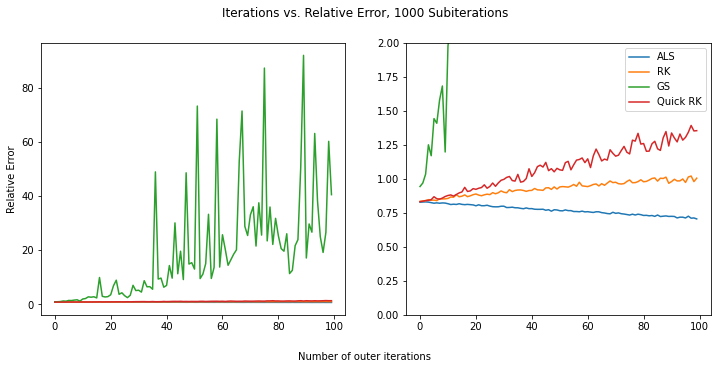

In [140]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

line1, = ax1.plot(range(100), df1['err'], label='ALS') 
line2, = ax1.plot(range(100), df2['err'], label='RK') 
line3, = ax1.plot(range(100), df3['err'], label='GS')
line4, = ax1.plot(range(100), df4['err'], label='Quick RK')

line1, = ax2.plot(range(100), df1['err'], label='ALS') 
line2, = ax2.plot(range(100), df2['err'], label='RK') 
line3, = ax2.plot(range(100), df3['err'], label='GS')
line4, = ax2.plot(range(100), df4['err'], label='Quick RK')

fig.suptitle('Iterations vs. Relative Error, 1000 Subiterations')
fig.text(0.5, 0, "Number of outer iterations", ha = "center")
ax1.set_ylabel('Relative Error')
ax2.set_ylim([0, 2])
ax2.legend(loc='upper right')

plt.show()

# Subiteration Tests (vary siter)

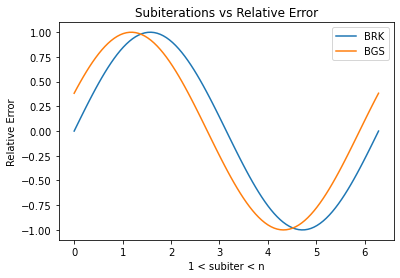

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0, 2*np.pi, 100)

line1, = ax.plot(x, np.sin(x), label='BRK') # add Line2D in ax.lines
line2, = ax.plot(x, np.sin(x+np.pi/8), label='BGS') # add another Line2D

ax.set_xlabel('1 < subiter < n')
ax.set_ylabel('Relative Error')
ax.set_title('Subiterations vs Relative Error')
ax.legend()

plt.show()

# Sampling Tests (vary k, matrix dim 200)

The following tests seek to investigate how the relative error changes with respect to the sampling size. We will vary the sampling size while fixing various combinations of outer iterations and subiterations. Note that the sampling size will be incremented by 2 to reduce the number of tests needed from 200 to 100. 

File naming convention: solver + "iter" + numberofiterations + "subiter" + numberofsubiterations + "s" + samplingsize + "err" + matrixdim

In [3]:
seed = 2
dim = 200
k = 4
iterdata, A, S = createmat(dim, k, seed)
np.count_nonzero(iterdata == 0) / (iterdata.shape[0]*iterdata.shape[1])

0.54735

In [26]:
%%time
i = 1
while(i <= 100):
    fname = "Errors/sampletests/alsiter" + str(i) + "subiter1err200.txt"
    mpmf(iterdata, k = 4, s = 1, niter = i, siter = 1, solver = 'als', filename = fname, loop = 15)
    i = i + 1

Wall time: 1min 58s


### iterations = 10, subiterations = 1000

In [39]:
%%time
i = 188
while(i <= 200):
    fname = "Errors/sampletests/brkiter10subiter1000s" + str(i) + "err200.txt"
    mpmf(iterdata, k = 4, s = i, niter = 10, siter = 1000, solver = 'brk', filename = fname, loop = 15)
    i = i + 2

Wall time: 12min 59s


In [142]:
%%time
i = 2
while(i <= 200):
    fname = "Errors/sampletests/quickbrkiter10subiter1000s" + str(i) + "err200.txt"
    mpmf(iterdata, k = 4, s = i, niter = 10, siter = 1000, solver = 'quickbrk', filename = fname, loop = 15)
    i = i + 2

Wall time: 40min 53s


In [50]:
# throws error for s = 2, 3, the norms of rows go to either 0 or inf
%%time
i = 1
while(i <= 4):
    fname = "Errors/sampletests/bgsiter10subiter1000s" + str(i) + "err200.txt"
    mpmf(iterdata, k = 4, s = i, niter = 10, siter = 1000, solver = 'bgs', filename = fname, loop = 15)
    i = i + 2

ValueError: probabilities contain NaN

### iterations = 50, subiterations = 1000

In [6]:
%%time
i = 104
while(i <= 200):
    fname = "Errors/sampletests/brkiter50subiter1000s" + str(i) + "err200.txt"
    mpmf(iterdata, k = 4, s = i, niter = 50, siter = 1000, solver = 'brk', filename = fname, loop = 15)
    i = i + 2

Wall time: 5h 47min 48s


In [4]:
%%time
i = 2
while(i <= 200):
    fname = "Errors/sampletests/quickbrkiter50subiter1000s" + str(i) + "err200.txt"
    mpmf(iterdata, k = 4, s = i, niter = 50, siter = 1000, solver = 'quickbrk', filename = fname, loop = 15)
    i = i + 2

Wall time: 3h 15min 49s


In [36]:
%%time
i = 2
while(i <= 200):
    fname = "Errors/sampletests/bgsiter50subiter1000s" + str(i) + "err200.txt"
    mpmf(iterdata, k = 4, s = i, niter = 50, siter = 1000, solver = 'bgs', filename = fname, loop = 15)
    i = i + 2

KeyboardInterrupt: 

### iterations = 100, subiterations = 1000 (save for a rainy day, way too expensive)

In [ ]:
%%time
i = 2
while(i <= 200):
    fname = "Errors/sampletests/brkiter100subiter1000s" + str(i) + "err200.txt"
    mpmf(iterdata, k = 4, s = i, niter = 100, siter = 1000, solver = 'brk', filename = fname, loop = 15)
    i = i + 2

In [ ]:
%%time
i = 2
while(i <= 200):
    fname = "Errors/sampletests/bgsiter100subiter1000s" + str(i) + "err200.txt"
    mpmf(iterdata, k = 4, s = i, niter = 100, siter = 1000, solver = 'bgs', filename = fname, loop = 15)
    i = i + 2

### 100 iterations, 10 subiterations

In [7]:
%%time
i = 2
while(i <= 200):
    fname = "Errors/sampletests/brkiter100subiter10s" + str(i) + "err200.txt"
    mpmf(iterdata, k = 4, s = i, niter = 100, siter = 10, solver = 'brk', filename = fname, loop = 15)
    i = i + 2

Wall time: 12min 42s


In [5]:
%%time
i = 2
while(i <= 200):
    fname = "Errors/sampletests/quickbrkiter100subiter10s" + str(i) + "err200.txt"
    mpmf(iterdata, k = 4, s = i, niter = 100, siter = 10, solver = 'quickbrk', filename = fname, loop = 15)
    i = i + 2

Wall time: 5min 5s


In [ ]:
%%time
i = 1
while(i <= 4):
    fname = "Errors/sampletests/bgsiter100subiter10s" + str(i) + "err200.txt"
    mpmf(iterdata, k = 4, s = i, niter = 100, siter = 10, solver = 'bgs', filename = fname, loop = 15)
    i = i + 2

### 100 iterations, 100 subiterations

In [8]:
%%time
i = 2
while(i <= 200):
    fname = "Errors/sampletests/brkiter100subiter100s" + str(i) + "err200.txt"
    mpmf(iterdata, k = 4, s = i, niter = 100, siter = 100, solver = 'brk', filename = fname, loop = 15)
    i = i + 2

Wall time: 1h 43min 44s


In [5]:
%%time
i = 6
while(i <= 200):
    fname = "Errors/sampletests/quickbrkiter100subiter100s" + str(i) + "err200.txt"
    mpmf(iterdata, k = 4, s = i, niter = 100, siter = 100, solver = 'quickbrk', filename = fname, loop = 15)
    i = i + 2

Wall time: 43min 25s


In [6]:
i = 4
fname = "Errors/sampletests/quickbrkiter100subiter100s" + str(i) + "err200.txt"
mpmf(iterdata, k = 4, s = i, niter = 100, siter = 100, solver = 'quickbrk', filename = fname, loop = 15)


LinAlgError: SVD did not converge

In [ ]:
%%time
i = 1
while(i <= 4):
    fname = "Errors/sampletests/bgsiter100subiter100s" + str(i) + "err200.txt"
    mpmf(iterdata, k = 4, s = i, niter = 100, siter = 100, solver = 'bgs', filename = fname, loop = 15)
    i = i + 2

### 100 iterations, 500 subiterations

In [5]:
%%time
i = 154
while(i <= 200):
    fname = "Errors/sampletests/brkiter100subiter500s" + str(i) + "err200.txt"
    mpmf(iterdata, k = 4, s = i, niter = 100, siter = 500, solver = 'brk', filename = fname, loop = 15)
    i = i + 2

Wall time: 3h 15min 35s


In [7]:
%%time
i = 2
while(i <= 200):
    fname = "Errors/sampletests/quickbrkiter100subiter500s" + str(i) + "err200.txt"
    mpmf(iterdata, k = 4, s = i, niter = 100, siter = 500, solver = 'quickbrk', filename = fname, loop = 15)
    i = i + 2

Wall time: 3h 24min 3s


In [ ]:
%%time
i = 1
while(i <= 4):
    fname = "Errors/sampletests/bgsiter100subiter500s" + str(i) + "err200.txt"
    mpmf(iterdata, k = 4, s = i, niter = 100, siter = 500, solver = 'bgs', filename = fname, loop = 15)
    i = i + 2

## Plots

In [30]:
datapath = 'Errors/sampletests/*.txt'
datafiles = list(glob.glob(datapath))
title3, err3, std3 = extracterr("^((?!quick).)*brk.*(iter10subiter1000).*", datafiles, 's')
print(title3)
print(len(title3))

['98', '96', '94', '92', '90', '8', '88', '86', '84', '82', '80', '78', '76', '74', '72', '70', '6', '68', '66', '64', '62', '60', '58', '56', '54', '52', '50', '4', '48', '46', '44', '42', '40', '38', '36', '34', '32', '30', '2', '28', '26', '24', '22', '20', '200', '198', '196', '194', '192', '190', '18', '188', '186', '184', '182', '180', '178', '176', '174', '172', '170', '16', '168', '166', '164', '162', '160', '158', '156', '154', '152', '150', '14', '148', '146', '144', '142', '140', '138', '136', '134', '132', '130', '12', '128', '126', '124', '122', '120', '118', '116', '114', '112', '110', '10', '108', '106', '104', '102', '100']
100


In [35]:
datapath = 'Errors/sampletests/*.txt'
datafiles = list(glob.glob(datapath))

title1, err1, std1 = extracterr(".*als.*(iter10subiter).*", datafiles, 'iter')
title2, err2, std2 = extracterr("^((?!quick).)*brk.*(iter10subiter1000).*", datafiles, 's')
title3, err3, std3 = extracterr(".*quickbrk.*(iter10subiter1000).*", datafiles, 's')
#title3, err3, std3 = extracterr(".*.*(subiter1000).*", datafiles)

df2 = pd.DataFrame({'s': list(map(int, title2)), 'err': err2, 'std': std2})
df3 = pd.DataFrame({'s': list(map(int, title3)), 'err': err3, 'std': std3})

df2 = df2.sort_values(by=['s'])
df3 = df3.sort_values(by=['s'])

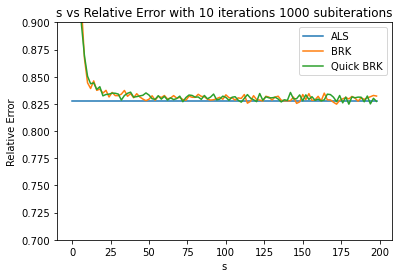

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)

line1 = ax.plot([2*x for x in range(100)], [err1 for i in range(100)], label='ALS')
line2, = ax.plot([2*x for x in range(100)], df2['err'], label='BRK') # add Line2D in ax.lines
line3, = ax.plot([2*x for x in range(100)], df3['err'], label='Quick BRK') # add Line2D in ax.lines

ax.set_xlabel('s')
ax.set_ylim([0.7,0.9])
ax.set_ylabel('Relative Error')
ax.set_title('s vs Relative Error with 10 iterations 1000 subiterations')
ax.legend()

plt.show()

In [37]:
datapath = 'Errors/sampletests/*.txt'
datafiles = list(glob.glob(datapath))

title1, err1, std1 = extracterr(".*als.*(iter50subiter).*", datafiles, 'iter')
title2, err2, std2 = extracterr("^((?!quick).)*brk.*(iter50subiter1000).*", datafiles, 's')
title3, err3, std3 = extracterr(".*quickbrk.*(iter50subiter1000).*", datafiles, 's')

df2 = pd.DataFrame({'s': list(map(int, title2)), 'err': err2, 'std': std2})
df3 = pd.DataFrame({'s': list(map(int, title3)), 'err': err3, 'std': std3})

df2 = df2.sort_values(by=['s'])
df3 = df3.sort_values(by=['s'])

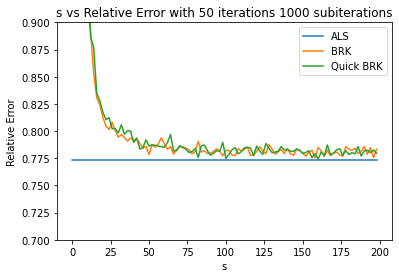

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)

line1 = ax.plot([2*x for x in range(100)], [err1 for i in range(100)], label='ALS')
line2, = ax.plot([2*x for x in range(100)], df2['err'], label='BRK') # add Line2D in ax.lines
line3, = ax.plot([2*x for x in range(100)], df3['err'], label='Quick BRK') # add Line2D in ax.lines

ax.set_xlabel('s')
ax.set_ylim([0.7,0.9])
ax.set_ylabel('Relative Error')
ax.set_title('s vs Relative Error with 50 iterations 1000 subiterations')
ax.legend()

plt.show()

In [50]:
datapath = 'Errors/sampletests/*.txt'
datafiles = list(glob.glob(datapath))

title1, err1, std1 = extracterr(".*als.*(iter100subiter).*", datafiles, 'iter')
title2, err2, std2 = extracterr("^((?!quick).)*brk.*(iter100subiter10s).*", datafiles, 's')
title3, err3, std3 = extracterr(".*quickbrk.*(iter100subiter10s).*", datafiles, 's')

df2 = pd.DataFrame({'s': list(map(int, title2)), 'err': err2, 'std': std2})
df3 = pd.DataFrame({'s': list(map(int, title3)), 'err': err3, 'std': std3})

df2 = df2.sort_values(by=['s'])
df3 = df3.sort_values(by=['s'])

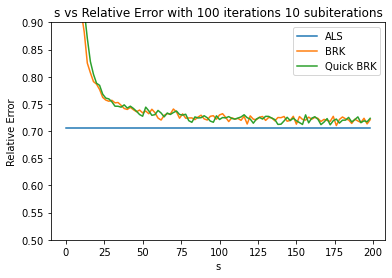

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)

line1 = ax.plot([2*x for x in range(100)], [err1 for i in range(100)], label='ALS')
line2, = ax.plot([2*x for x in range(100)], df2['err'], label='BRK') 
line3, = ax.plot([2*x for x in range(100)], df3['err'], label='Quick BRK') 

ax.set_xlabel('s')
ax.set_ylim([0.5,0.9])
ax.set_ylabel('Relative Error')
ax.set_title('s vs Relative Error with 100 iterations 10 subiterations')
ax.legend()

plt.show()

In [53]:
datapath = 'Errors/sampletests/*.txt'
datafiles = list(glob.glob(datapath))

title1, err1, std1 = extracterr(".*als.*(iter100subiter).*", datafiles, 'iter')
title2, err2, std2 = extracterr("^((?!quick).)*brk.*(iter100subiter100s).*", datafiles, 's')
title3, err3, std3 = extracterr(".*quickbrk.*(iter100subiter100s).*", datafiles, 's')

df2 = pd.DataFrame({'s': list(map(int, title2)), 'err': err2, 'std': std2})
df3 = pd.DataFrame({'s': list(map(int, title3)), 'err': err3, 'std': std3})

df2 = df2.sort_values(by=['s'])
df3 = df3.sort_values(by=['s'])

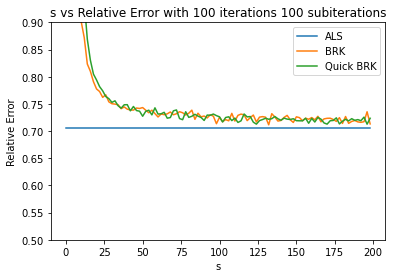

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)

line1 = ax.plot([2*x for x in range(100)], [err1 for i in range(100)], label='ALS')
line2, = ax.plot([2*x for x in range(100)], df2['err'], label='BRK')
line3, = ax.plot([2*x for x in range(100)], df3['err'], label='Quick BRK') 

ax.set_xlabel('s')
ax.set_ylim([0.5,0.9])
ax.set_ylabel('Relative Error')
ax.set_title('s vs Relative Error with 100 iterations 100 subiterations')
ax.legend()

plt.show()

In [55]:
datapath = 'Errors/sampletests/*.txt'
datafiles = list(glob.glob(datapath))

title1, err1, std1 = extracterr(".*als.*(iter100subiter).*", datafiles, 'iter')
title2, err2, std2 = extracterr("^((?!quick).)*brk.*(iter100subiter500s).*", datafiles, 's')
title3, err3, std3 = extracterr(".*quickbrk.*(iter100subiter500s).*", datafiles, 's')

df2 = pd.DataFrame({'s': list(map(int, title2)), 'err': err2, 'std': std2})
df3 = pd.DataFrame({'s': list(map(int, title3)), 'err': err3, 'std': std3})

df2 = df2.sort_values(by=['s'])
df3 = df3.sort_values(by=['s'])

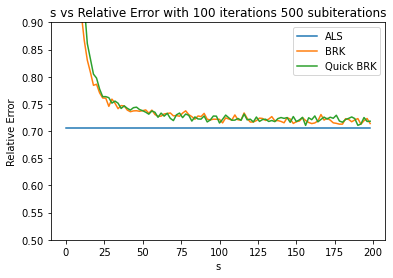

In [126]:
fig = plt.figure()
ax = fig.add_subplot(111)

line1 = ax.plot([2*x for x in range(100)], [err1 for i in range(100)], label='ALS')
line2, = ax.plot([2*x for x in range(100)], df2['err'], label='BRK') 
line3, = ax.plot([2*x for x in range(100)], df3['err'], label='Quick BRK') 

ax.set_xlabel('s')
ax.set_ylim([0.5,0.9])
ax.set_ylabel('Relative Error')
ax.set_title('s vs Relative Error with 100 iterations 500 subiterations')
ax.legend()

plt.show()

# Computational Time

### BRK

In [57]:
setup = '''
from functions import brktest
import numpy as np

bfactor200 = np.random.choice(4, size=(200,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
bweight200 = np.random.randint(0, 2, size=(4, 200))
b200 = np.matmul(bfactor200, bweight200)
'''
testcode = "brktest(b200, k = 4, s = " + str(100) + ", niter = 100, kacziter = 1000)"
timeit.timeit(stmt = testcode, setup = setup, number = 1)

124.56286120000004

In [58]:
setup = '''
from functions import mf, createmat
import numpy as np

data, factor, weight = createmat(200, 4, 1)
'''

In [59]:
with open('Errors/comptime/brksampletime.txt', 'w') as f:
    for i in np.arange(200):
        testcode = "mf(data, k = 4, s = " + str(i + 1) + ", niter = 100, siter = 100, solver = 'brk')"
        #testcode = "np.matmul(np.random.randint(5, size = 1000), np.random.randint(5, size = 1000))"
        time = timeit.timeit(stmt = testcode, setup = setup, number = 3) / 3
        f.write(str(time) + ', ')
        f.flush()

In [68]:
with open('Errors/comptime/alssampletime.txt', 'w') as f:
    testcode = "mf(data, k = 4, s = " + str(i + 1) + ", niter = 100, siter = 100, solver = 'als')"
    #testcode = "np.matmul(np.random.randint(5, size = 1000), np.random.randint(5, size = 1000))"
    time = timeit.timeit(stmt = testcode, setup = setup, number = 100) /100
    f.write(str(time) + ', ')

In [62]:
with open('Errors/comptime/bgssampletime.txt', 'w') as f:
    for i in np.arange(4):
        testcode = "mf(data, k = 4, s = " + str(i + 1) + ", niter = 100, siter = 100, solver = 'bgs')"
        #testcode = "np.matmul(np.random.randint(5, size = 1000), np.random.randint(5, size = 1000))"
        time = timeit.timeit(stmt = testcode, setup = setup, number = 3) / 3
        f.write(str(time) + ', ')
        f.flush()

In [66]:
with open('Errors/comptime/quickbrksampletime.txt', 'w') as f:
    for i in np.arange(200):
        testcode = "mf(data, k = 4, s = " + str(i + 1) + ", niter = 100, siter = 100, solver = 'quickbrk')"
        #testcode = "np.matmul(np.random.randint(5, size = 1000), np.random.randint(5, size = 1000))"
        time = timeit.timeit(stmt = testcode, setup = setup, number = 3) / 3
        f.write(str(time) + ', ')
        f.flush()

LinAlgError: SVD did not converge

[2.3105097000031187, 2.654530566665926, 2.825936566669649]


ValueError: x and y must have same first dimension, but have shapes (200,) and (3,)

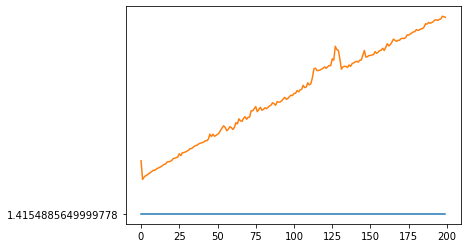

In [131]:
with open('Errors/comptime/alssampletime.txt', 'r') as f:
    alstime = f.read().split(', ')
with open('Errors/comptime/brksampletime.txt', 'r') as f:
    brktime = f.read().split(', ')
with open('Errors/comptime/quickbrksampletime.txt', 'r') as f:
    quickbrktime = f.read().split(', ')

brktime = [float(i) for i in brktime[:-1]]
quickbrktime = [float(i) for i in quickbrktime[:-1]]
fig = plt.figure()
ax = fig.add_subplot(111)
print(quickbrktime)

line1 = ax.plot(range(200), [alstime[0] for i in range(200)], label='ALS')
line2, = ax.plot(range(200), brktime, label='BRK') 
line3, = ax.plot(range(200), quickbrktime, label='Quick BRK') 
#line3, = ax.plot([x for x in range(200)], df3['err'], label='Quick BRK') 

ax.set_xlabel('s')
ax.set_ylabel('Comp Time (s)')
ax.set_title('s vs Computational Time')
ax.legend()

plt.show()

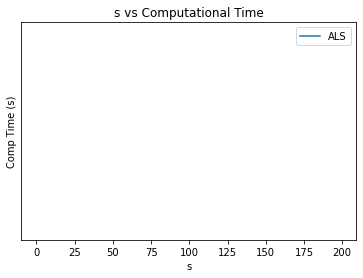

In [121]:
with open('Errors/comptime/alssampletime.txt', 'r') as f:
    alstime = f.read().split(', ')
fig = plt.figure()
ax = fig.add_subplot(111)

line1 = ax.plot(range(200), [alstime[0] for i in range(200)], label='ALS')

ax.set_xlabel('s')
ax.set_ylim([0.5,0.9])
ax.set_ylabel('Comp Time (s)')
ax.set_title('s vs Computational Time')
ax.legend()

plt.show()

Text(0.5, 0, 'k')

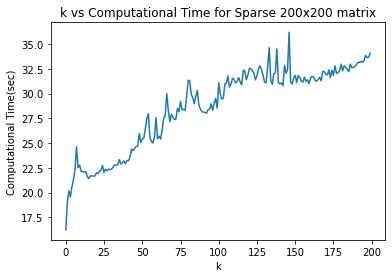

In [120]:
with open('Errors/comptime/brktime.txt', 'r') as f:
    x = f.read().split(', ')
x = [float(i) for i in x[:-1]]

plt.plot(range(200), x)
plt.title("k vs Computational Time for Sparse 200x200 matrix")
plt.ylabel("Computational Time(sec)")
plt.xlabel("k")

['1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.4154885649999778', '1.415488

Text(0.5, 0, 'k')

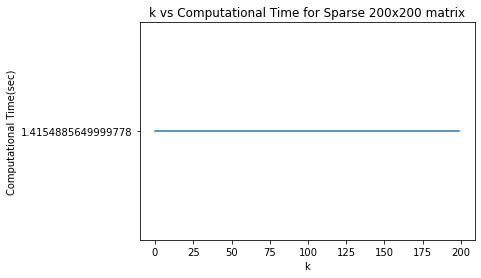

In [124]:
with open('Errors/comptime/alssampletime.txt', 'r') as f:
    time = f.read().split(', ')
#time = [float(i) for i in x[:-1]]
print([time[0] for i in range(200)])
plt.plot(range(200), [time[0] for i in range(200)])
plt.title("k vs Computational Time for Sparse 200x200 matrix")
plt.ylabel("Computational Time(sec)")
plt.xlabel("k")

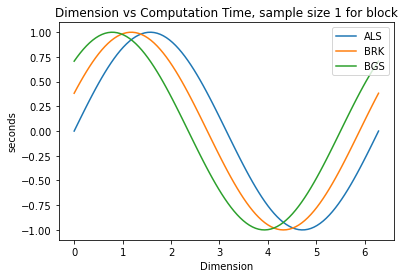

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0, 2*np.pi, 100)

line1, = ax.plot(x, np.sin(x), label='ALS') # add Line2D in ax.lines
line2, = ax.plot(x, np.sin(x+np.pi/8), label='BRK') # add another Line2D
line3, = ax.plot(x, np.sin(x+2*np.pi/8), label='BGS')

ax.set_xlabel('Dimension')
ax.set_ylabel('seconds')
ax.set_title('Dimension vs Computation Time, sample size 1 for block')
ax.legend(loc='upper right')

plt.show()

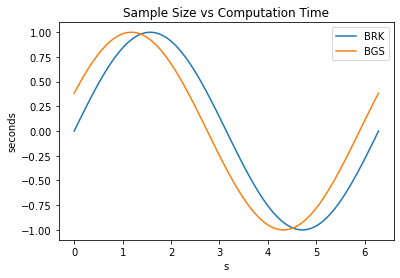

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0, 2*np.pi, 100)

line1, = ax.plot(x, np.sin(x), label='BRK') # add Line2D in ax.lines
line2, = ax.plot(x, np.sin(x+np.pi/8), label='BGS') # add another Line2D

ax.set_xlabel('s')
ax.set_ylabel('seconds')
ax.set_title('Sample Size vs Computation Time')
ax.legend(loc='upper right')

plt.show()